In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\dougl\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


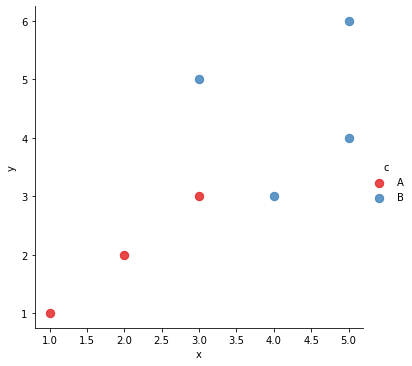

In [4]:
data = pd.read_csv('knn.csv')
sns.lmplot('x','y', data=data,
          hue='c',palette='Set1',
          fit_reg=False, scatter_kws={'s':70})
plt.show()

In [5]:
# Calculating the distance between points: euclidean, manhattan, and minkowski distances

def euclidean_distance(pt1, pt2, dimension):
    distance = 0
    for x in range(dimension):
        distance += np.square(pt1[x]-pt2[x])
    return np.sqrt(distance)


In [14]:
def knn(training_points, test_point, k):
    distances = {}
# the number of axes we are dealing with
    dimension = test_point.shape[1]
# calculating euclidean distance
    for x in range(len(training_points)):
        dist = euclidean_distance(test_point, training_points.iloc[x], dimension)
        # record the distance for each training points
        distances[x] = dist[0]
    
# sort the distances
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
# to store the neighbors
    neighbors = []
# extract the top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
# for each neighbor found, find out its class
    class_counter = {}
    for x in range(len(neighbors)):
# find out the class for that particular point
        cls = training_points.iloc[neighbors[x]][-1]
        if cls in class_counter:
            class_counter[cls] += 1
        else:
            class_counter[cls] = 1
# sort the class_counter in desc order
    sorted_counter = sorted(class_counter.items(),
                           key=operator.itemgetter(1),
                           reverse=True)
# return the class with the most count, as well as the neighbors found
    return(sorted_counter[0][0], neighbors)

In [16]:
# test_set = [[3,3,9]]
# test = pd.DataFrame(test_set)
# cls,neighbors = knn(data, test, 5)
# print("Predicted Class: " + cls)

In [17]:
%matplotlib inline
import matplotlib.patches as mpatches
from sklearn import svm, datasets

In [18]:
iris = datasets.load_iris()

In [22]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

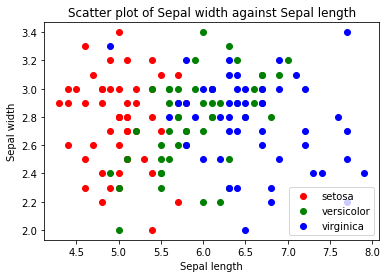

In [37]:
X = iris.data[:, :2]
y = iris.target

# plot the points
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==1, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

(array([0, 1, 2]), array([50, 51, 49], dtype=int64))


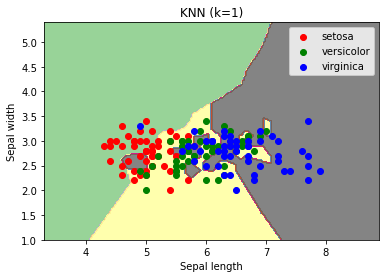

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Explore different values for K
k=1
knn = KNeighborsClassifier(n_neighbors=k)
# fit the model
knn.fit(X, y)
# min and max for the first feature
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
# min and max for the second feature
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
# step size in the mesh
h = (x_max/x_min)/100
# make predictions for each of the points in xx, yy
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# draw result using color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
# plot the training points
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==1, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

predictions = knn.predict(X)
# classifications based on predictions
print(np.unique(predictions, return_counts=True))

In [ ]:
# ^above is a meshgrid. uses k=1. this is prone to overfitting.

(array([0, 1, 2]), array([49, 51, 50], dtype=int64))


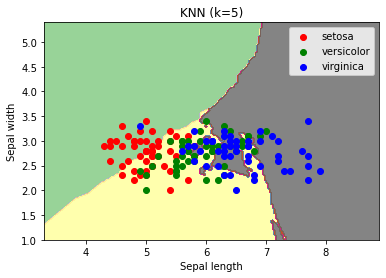

In [26]:
#k=5
k=5
knn = KNeighborsClassifier(n_neighbors=k)
# fit the model
knn.fit(X, y)
# min and max for the first feature
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
# min and max for the second feature
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
# step size in the mesh
h = (x_max/x_min)/100
# make predictions for each of the points in xx, yy
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# draw result using color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
# plot the training points
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==1, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

predictions = knn.predict(X)
# classifications based on predictions
print(np.unique(predictions, return_counts=True))

(array([0, 1, 2]), array([51, 49, 50], dtype=int64))


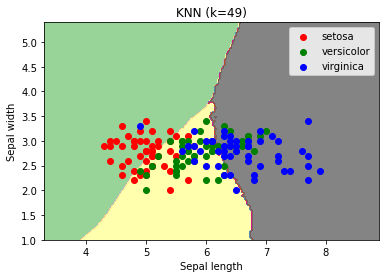

In [27]:
k=49
knn = KNeighborsClassifier(n_neighbors=k)
# fit the model
knn.fit(X, y)
# min and max for the first feature
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
# min and max for the second feature
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
# step size in the mesh
h = (x_max/x_min)/100
# make predictions for each of the points in xx, yy
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# draw result using color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
# plot the training points
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==1, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

predictions = knn.predict(X)
# classifications based on predictions
print(np.unique(predictions, return_counts=True))

In [28]:
# seems to have more distinct boundaries at higher levels such as 49.

(array([0, 1, 2]), array([57, 58, 35], dtype=int64))


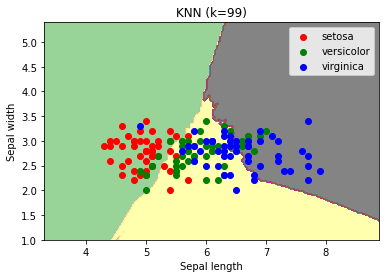

In [30]:
k=99
knn = KNeighborsClassifier(n_neighbors=k)
# fit the model
knn.fit(X, y)
# min and max for the first feature
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
# min and max for the second feature
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
# step size in the mesh
h = (x_max/x_min)/100
# make predictions for each of the points in xx, yy
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# draw result using color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
# plot the training points
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==1, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

predictions = knn.predict(X)
# classifications based on predictions
print(np.unique(predictions, return_counts=True));

In [31]:
# when k increases to a large value, underfitting occurs.

### parameter tuning K, with cross validation.

In [34]:
from sklearn.model_selection import cross_val_score

cv_scores=[]
# use all features
X=iris.data[:,:4]
y=iris.target
# number of folds
folds=10
# creating odd list of K for KNN
ks=list(range(1,int(len(X)*((folds-1)/folds))))
# remove multiples of 3
ks = [k for k in ks if k%3 !=0]
# perform k-fold cross validation
for k in ks:
    knn=KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn, X, y, cv=folds, scoring='accuracy')
    mean=scores.mean()
    cv_scores.append(mean)
    print(k, mean)

1 0.96
2 0.9533333333333334
4 0.9666666666666666
5 0.9666666666666668
7 0.9666666666666668
8 0.9666666666666668
10 0.9666666666666668
11 0.9666666666666668
13 0.9800000000000001
14 0.9733333333333334
16 0.9733333333333334
17 0.9733333333333334
19 0.9733333333333334
20 0.9800000000000001
22 0.9666666666666666
23 0.9733333333333334
25 0.9666666666666666
26 0.96
28 0.9533333333333334
29 0.9533333333333334
31 0.9466666666666667
32 0.9466666666666667
34 0.9466666666666667
35 0.9466666666666667
37 0.9466666666666667
38 0.9466666666666667
40 0.9533333333333334
41 0.9533333333333334
43 0.9466666666666667
44 0.9400000000000001
46 0.9333333333333333
47 0.9333333333333333
49 0.9400000000000001
50 0.9266666666666667
52 0.9333333333333333
53 0.9333333333333333
55 0.9333333333333333
56 0.9066666666666666
58 0.9133333333333334
59 0.9200000000000002
61 0.9199999999999999
62 0.9066666666666666
64 0.9
65 0.9
67 0.8866666666666667
68 0.8800000000000001
70 0.8866666666666667
71 0.8866666666666667
73 0.893

The optimal number of neighbors is 13


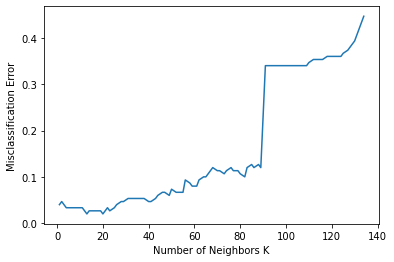

In [35]:
# Finding the Optimal K: simply find the value of k that gives the highest accuracy. 
# or in this case, you want to find the lowest misclassification error (MSE).
MSE = [1-x for x in cv_scores]

#determining the best k (min. MSE)
optimal_k = ks[MSE.index(min(MSE))]
print(f'The optimal number of neighbors is {optimal_k}')

#plot the misclassification error vs k
plt.plot(ks, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

(array([0, 1, 2]), array([51, 46, 53], dtype=int64))


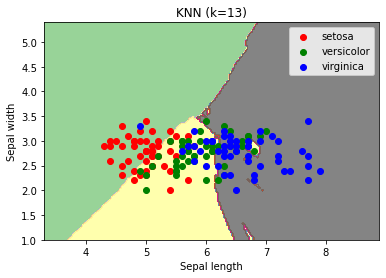

In [38]:
# if this cell doesnt run, rerun the cell where instantiates iris and X and y
k=13
knn = KNeighborsClassifier(n_neighbors=k)
# fit the model
knn.fit(X, y)
# min and max for the first feature
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
# min and max for the second feature
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
# step size in the mesh
h = (x_max/x_min)/100
# make predictions for each of the points in xx, yy
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# draw result using color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
# plot the training points
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==1, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

predictions = knn.predict(X)
# classifications based on predictions
print(np.unique(predictions, return_counts=True));